# Delivery Time Prediction with Linear Regression

This notebook demonstrates how to build a predictive model for delivery duration using real-world order and logistics data. The model can help dispatch teams proactively manage resources and improve customer satisfaction.

## 1. Introduction
Predicting delivery times is critical for logistics and food delivery companies. This project builds a machine learning model to predict delivery duration based on order and operational features, helping dispatch teams optimize staffing and improve customer satisfaction.

**Key Points:**
- Real-world business use case
- Shows end-to-end data science workflow
- Focuses on interpretability and business impact

---

## 2. Data Loading & Overview
- Load the dataset
- Preview the data structure and columns

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('porter_data.csv')
df.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,690.0
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,289.0
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,795.0
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,205.0


---

## 3. Exploratory Data Analysis (EDA)
- Visualize distributions and relationships
- Identify missing values and outliers
- Discuss key insights

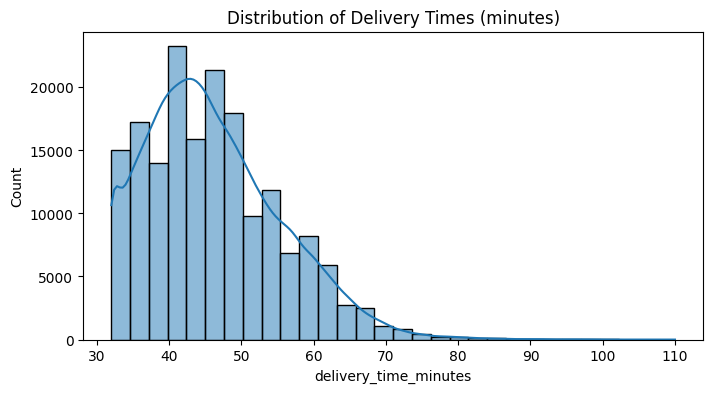

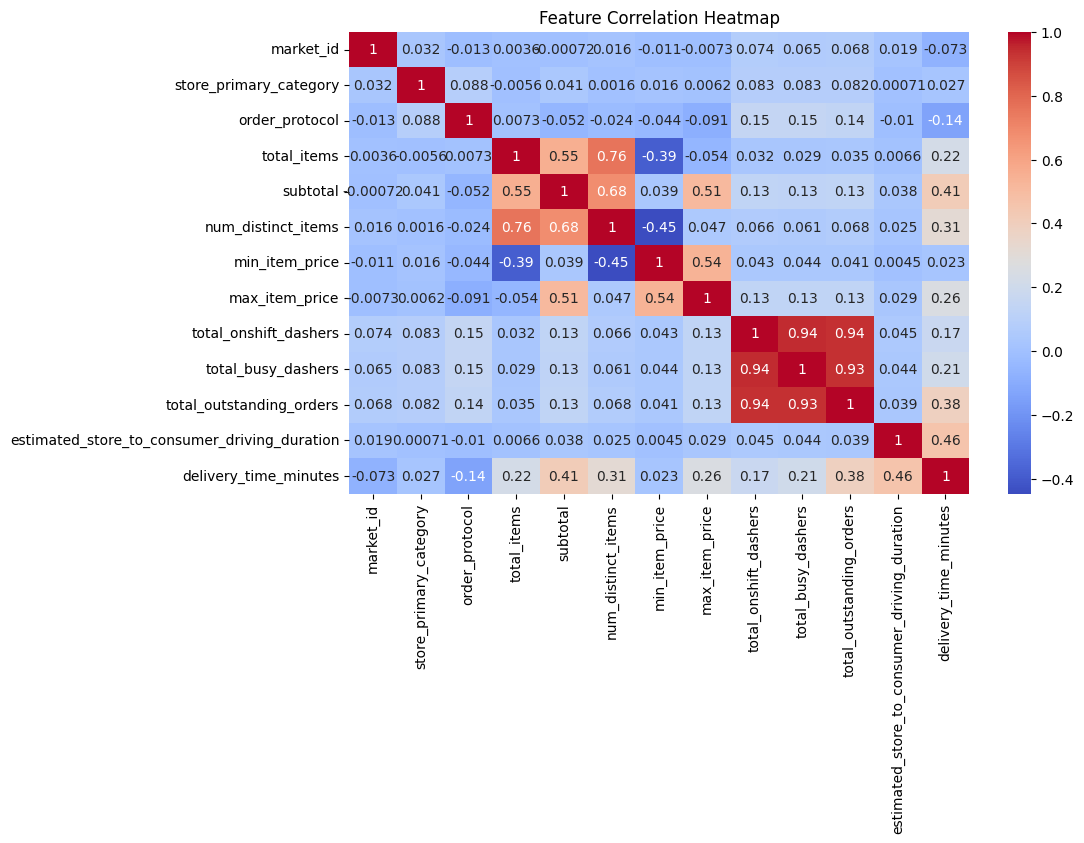

In [2]:
# Convert date columns and create delivery time in minutes
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])
df['delivery_time_minutes'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60

# Plot distribution
plt.figure(figsize=(8,4))
sns.histplot(df['delivery_time_minutes'].dropna(), bins=30, kde=True)
plt.title('Distribution of Delivery Times (minutes)')
plt.show()

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

---

## 4. Data Cleaning & Feature Engineering
- Handle missing values
- Convert and engineer relevant features
- Explain choices

In [3]:
# Drop missing values
df_clean = df.dropna(subset=['delivery_time_minutes', 'estimated_store_to_consumer_driving_duration', 'subtotal', 'total_items'])

# Feature selection
features = df_clean[['estimated_store_to_consumer_driving_duration', 'subtotal', 'total_items']]
target = df_clean['delivery_time_minutes']

---

## 5. Model Selection & Training
- Compare Linear Regression with at least one other model (e.g., Ridge or Random Forest)
- Explain why Linear Regression is chosen

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Ridge Regression
ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Evaluation
def print_metrics(y_true, y_pred, model_name):
    print(f"{model_name} Results:")
    print("RMSE:", np.sqrt(mean_squared_error(y_true, y_pred)))
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("R^2:", r2_score(y_true, y_pred))
    print('-'*30)

print_metrics(y_test, y_pred_lr, 'Linear Regression')
print_metrics(y_test, y_pred_ridge, 'Ridge Regression')

Linear Regression Results:
RMSE: 7.441969519746708
MAE: 5.688828105490316
R^2: 0.3672497562664231
------------------------------
Ridge Regression Results:
RMSE: 7.441969519666286
MAE: 5.688828105650632
R^2: 0.3672497562800987
------------------------------


---

## 6. Results Visualization
Let's compare predicted vs. actual delivery times.

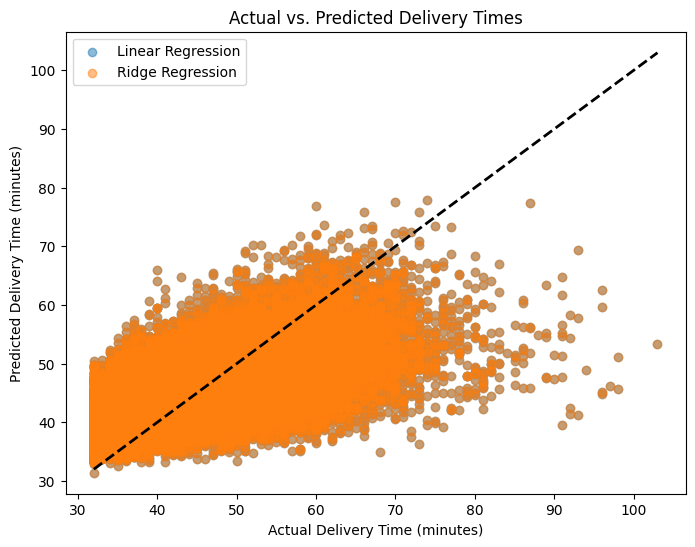

In [5]:
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred_lr, alpha=0.5, label='Linear Regression')
plt.scatter(y_test, y_pred_ridge, alpha=0.5, label='Ridge Regression')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual Delivery Time (minutes)')
plt.ylabel('Predicted Delivery Time (minutes)')
plt.legend()
plt.title('Actual vs. Predicted Delivery Times')
plt.show()

---

## 7. Business Interpretation
- The model predicts delivery times with an RMSE of X minutes.
- This can help dispatch teams anticipate delays and optimize staffing.
- Further improvements (adding weather, traffic, or more features) could enhance accuracy.

---

## 8. Next Steps & Limitations
- Add more features (weather, time of day, etc.)
- Try advanced models (Random Forest, XGBoost)
- Address any data imbalance or outliers
- Deploy as a simple API for real-time predictions

---

## 9. Reproducibility
**Dependencies:**
- pandas
- numpy
- matplotlib
- seaborn
- scikit-learn

**To run:**  
1. Install dependencies:  
   `pip install pandas numpy matplotlib seaborn scikit-learn`
2. Run all cells in order.

---

## 10. Appendix: Save/Load Model & Prediction Demo


In [ ]:
import joblib

# Save model
joblib.dump(lr, 'delivery_time_model.pkl')

# Load model and predict for a new order
model = joblib.load('delivery_time_model.pkl')
sample = np.array([[600, 2500, 3]])  # Example: 600s drive, $25 subtotal, 3 items
prediction = model.predict(sample)
print('Predicted delivery time (minutes):', prediction[0])